# World Happiness Report

**Minería de datos al data set World Happiness Report 2021, siguiendo los estándares de la metodología CRISP-DM (Cross Industry Standard Process for Data Mining).**

## 3. Preparación de los datos

In [1]:
#Importamos librerías básicas

import pandas as pd #Manipular dataframes
import numpy as np #Operaciones vectores y matrices
import matplotlib.pyplot as plt #Gráficas

In [2]:
# Cargamos los datos
data2021 = pd.read_csv("world-happiness-report-2021.csv")
data2021.head(-10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Madagascar,Sub-Saharan Africa,4.208,0.072,4.349,4.068,7.396,0.686,59.305,0.552,-0.005,0.803,2.43,0.266,0.503,0.341,0.207,0.185,0.087,2.620
135,Togo,Sub-Saharan Africa,4.107,0.077,4.258,3.956,7.362,0.569,54.914,0.619,0.032,0.772,2.43,0.254,0.239,0.203,0.289,0.209,0.107,2.806
136,Zambia,Sub-Saharan Africa,4.073,0.069,4.209,3.938,8.145,0.708,55.809,0.782,0.061,0.823,2.43,0.528,0.552,0.231,0.487,0.227,0.074,1.975
137,Sierra Leone,Sub-Saharan Africa,3.849,0.077,4.001,3.698,7.434,0.630,51.651,0.717,0.084,0.866,2.43,0.279,0.377,0.100,0.408,0.243,0.047,2.396


In [3]:
# Conocimiento los datos
print(data2021.info())
# Dice cuantos registros y columnas se tienen
# nombres de columna
# y el tipo de dato de las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [4]:
# Corrección del tipo de datos object a categorías
data2021['Country name'] = data2021['Country name'].astype('category')
data2021['Regional indicator'] = data2021['Regional indicator'].astype('category')

Todo Clustering se hace con datos numéricos, es por eso que primero se han de convertir los datos categóricos a numéricos.

In [5]:
# Entendiendo las columnas
print(data2021['Country name'])

0          Finland
1          Denmark
2      Switzerland
3          Iceland
4      Netherlands
          ...     
144        Lesotho
145       Botswana
146         Rwanda
147       Zimbabwe
148    Afghanistan
Name: Country name, Length: 149, dtype: category
Categories (149, object): ['Afghanistan', 'Albania', 'Algeria', 'Argentina', ..., 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']


In [6]:
# Entendiendo las columnas
data2021['Regional indicator']

0          Western Europe
1          Western Europe
2          Western Europe
3          Western Europe
4          Western Europe
              ...        
144    Sub-Saharan Africa
145    Sub-Saharan Africa
146    Sub-Saharan Africa
147    Sub-Saharan Africa
148            South Asia
Name: Regional indicator, Length: 149, dtype: category
Categories (10, object): ['Central and Eastern Europe', 'Commonwealth of Independent States', 'East Asia', 'Latin America and Caribbean', ..., 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']

In [7]:
data2021['Regional indicator'].unique()

['Western Europe', 'North America and ANZ', 'Middle East and North Africa', 'Latin America and Caribbean', 'Central and Eastern Europe', 'East Asia', 'Southeast Asia', 'Commonwealth of Independent States', 'Sub-Saharan Africa', 'South Asia']
Categories (10, object): ['Western Europe', 'North America and ANZ', 'Middle East and North Africa', 'Latin America and Caribbean', ..., 'Southeast Asia', 'Commonwealth of Independent States', 'Sub-Saharan Africa', 'South Asia']

Para fines del Clustering, no necesitamos incluir como variables los paises ni las regiones. 

In [8]:
# Data for clustering
#data_for_clustering = data.drop(['Country', 'Regional indicator'], axis=1)
data_for_clustering = data2021.iloc[:, 4:12]
data_for_clustering['Ladder score'] = data2021.iloc[:, 2:3]
data_for_clustering

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score
0,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,7.842
1,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,7.620
2,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,7.571
3,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,7.554
4,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,7.464
...,...,...,...,...,...,...,...,...,...
144,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,3.512
145,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,3.467
146,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,3.415
147,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,3.145


In [9]:
data_for_clustering.describe()

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,5.532839
std,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,1.073924
min,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.523000
25%,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,4.852000
50%,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,5.534000
75%,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,6.255000
max,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,7.842000


## 4. Modelado

D:\Anaconda\envs\ml_py38\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


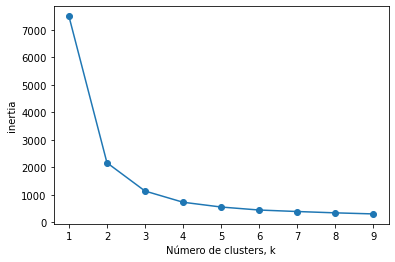

In [10]:
from sklearn.cluster import KMeans
# Método del codo para encontrar la mejor cantidad de clusters
ks = range(1, 10) # Para crear variables del 1 al 10
inertias = [] 

# Calcularemos las inercias (o cohesiones) para todas las cantidades de cluster
for k in ks:
  # Crear modelo
  model = KMeans(n_clusters=k)
  model.fit(data_for_clustering)
  inertias.append(model.inertia_)

# Graficar cantidad de clusters vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Con la cohesión, nosotros definimos que lo mejor es trabajar con 3 cluster.

In [11]:
#Creación de modelo de clustering con Kmeans
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=500)
model.fit(data_for_clustering)

KMeans(max_iter=500, n_clusters=3)

## 5. Evaluación: Clustering

In [12]:
#Evaluación

from sklearn import metrics
print("Cohesion:",model.inertia_)

Cohesion: 1138.4886655717114


In [13]:
# Perfilamiento
# Describimos los centroides de los clusters
model.cluster_centers_

array([[ 4.53641860e+00,  4.23625581e+00,  8.07883721e+00,
         6.86511628e-01,  5.60167907e+01,  7.15813953e-01,
         3.43488372e-02,  7.67069767e-01,  4.38630233e+00],
       [ 6.77602564e+00,  6.60317949e+00,  1.06966154e+01,
         9.08974359e-01,  7.26801538e+01,  8.51692308e-01,
        -2.13076923e-02,  5.84564103e-01,  6.68964103e+00],
       [ 5.70480597e+00,  5.48573134e+00,  9.56479104e+00,
         8.42194030e-01,  6.62787910e+01,  8.05253731e-01,
        -4.32985075e-02,  7.85194030e-01,  5.59531343e+00]])

In [14]:
#Centroides de los clusters

centroides=pd.DataFrame(model.cluster_centers_, columns=data_for_clustering.columns.values)

centroides

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score
0,4.536419,4.236256,8.078837,0.686512,56.016791,0.715814,0.034349,0.767070,4.386302
1,6.776026,6.603179,10.696615,0.908974,72.680154,0.851692,-0.021308,0.584564,6.689641
2,5.704806,5.485731,9.564791,0.842194,66.278791,0.805254,-0.043299,0.785194,5.595313


In [15]:
# redondeamos para leer más fácil los datos
centroides.round(0)

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score
0,5.0,4.0,8.0,1.0,56.0,1.0,0.0,1.0,4.0
1,7.0,7.0,11.0,1.0,73.0,1.0,-0.0,1.0,7.0
2,6.0,5.0,10.0,1.0,66.0,1.0,-0.0,1.0,6.0


Al dataset original, le agregamos una columna que indique en que cluster quedó

In [16]:
# Asignación de clusteres
data_for_clustering['cluster']=model.labels_

data_for_clustering.head()

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score,cluster
0,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,7.842,1
1,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,7.620,1
2,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,7.571,1
3,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,7.554,1
4,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,7.464,1


In [36]:
data_for_clustering.tail()

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score,cluster
144,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,3.512,0
145,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,3.467,0
146,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,3.415,0
147,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,3.145,0
148,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.523,0


In [17]:
cluster_by_country = data_for_clustering.copy()

In [18]:
cluster_by_country.insert(0, 'Country name', data2021['Country name'])
cluster_by_country.insert(1, 'Region', data2021['Regional indicator'])


In [19]:
cluster_by_country.head(-1)

,Country name,Region,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score,cluster
0,Finland,Western Europe,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,7.842,1
1,Denmark,Western Europe,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,7.620,1
2,Switzerland,Western Europe,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,7.571,1
3,Iceland,Western Europe,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,7.554,1
4,Netherlands,Western Europe,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,7.464,1
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Malawi,Sub-Saharan Africa,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,3.600,0
144,Lesotho,Sub-Saharan Africa,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,3.512,0
145,Botswana,Sub-Saharan Africa,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,3.467,0
146,Rwanda,Sub-Saharan Africa,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,3.415,0


<AxesSubplot:ylabel='cluster'>

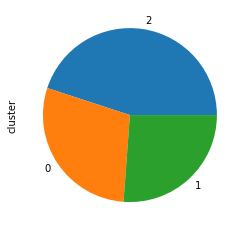

In [20]:
# Cantidad de datos en cada cluster
data_for_clustering['cluster'].value_counts().plot(kind='pie')

In [21]:
# Número de paises en cada cluster
pd.value_counts(data_for_clustering['cluster'])

2    67
0    43
1    39
Name: cluster, dtype: int64

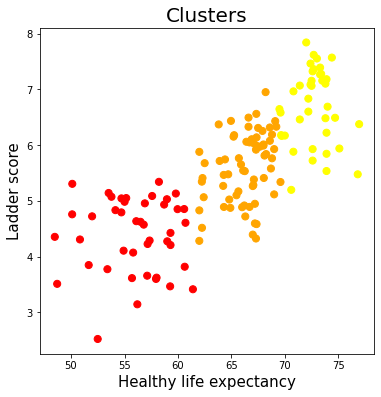

In [22]:
# Graficando clusteres
fig = plt.figure(figsize= (6,6))

# Un grafico dentro de la figura en el objeto ax
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Healthy life expectancy', fontsize = 15)
ax.set_ylabel('Ladder score', fontsize = 15)
ax.set_title('Clusters', fontsize = 20)

color_theme = np.array(['red', 'yellow', 'orange'])
ax.scatter(x = data_for_clustering['Healthy life expectancy'], y = data_for_clustering['Ladder score'],
          color = color_theme[data_for_clustering.cluster], s = 50)
plt.show()

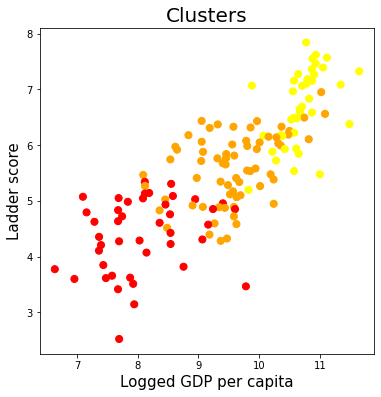

In [23]:
# Graficando clusteres
fig = plt.figure(figsize= (6,6))

# Un grafico dentro de la figura en el objeto ax
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Logged GDP per capita', fontsize = 15)
ax.set_ylabel('Ladder score', fontsize = 15)
ax.set_title('Clusters', fontsize = 20)

color_theme = np.array(['red', 'yellow', 'orange'])
ax.scatter(x = data_for_clustering['Logged GDP per capita'], y = data_for_clustering['Ladder score'],
          color = color_theme[data_for_clustering.cluster], s = 50)
plt.show()

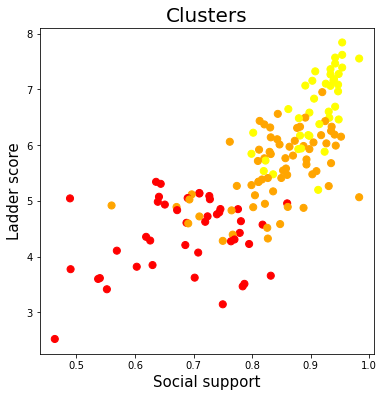

In [37]:
# Graficando clusteres
fig = plt.figure(figsize= (6,6))

# Un grafico dentro de la figura en el objeto ax
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Social support', fontsize = 15)
ax.set_ylabel('Ladder score', fontsize = 15)
ax.set_title('Clusters', fontsize = 20)

color_theme = np.array(['red', 'yellow', 'orange'])
ax.scatter(x = data_for_clustering['Social support'], y = data_for_clustering['Ladder score'],
          color = color_theme[data_for_clustering.cluster], s = 50)
plt.show()

## 5. Evaluación: Selección de Factores

In [24]:
data_for_clustering.head()

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score,cluster
0,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,7.842,1
1,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,7.620,1
2,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,7.571,1
3,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,7.554,1
4,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,7.464,1


In [25]:
data_for_clustering.corr()

,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score,cluster
upperwhisker,1.000000,0.997489,0.777995,0.749215,0.758455,0.607797,-0.012616,-0.417560,0.999347,0.390523
lowerwhisker,0.997489,1.000000,0.800064,0.763299,0.776364,0.606944,-0.022794,-0.423976,0.999396,0.403446
Logged GDP per capita,0.777995,0.800064,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337,0.789760,0.461942
Social support,0.749215,0.763299,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207,0.756888,0.510663
Healthy life expectancy,0.758455,0.776364,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374,0.768099,0.557089
Freedom to make life choices,0.607797,0.606944,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363,0.607753,0.293837
Generosity,-0.012616,-0.022794,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962,-0.017799,-0.212625
Perceptions of corruption,-0.417560,-0.423976,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000,-0.421140,0.096392
Ladder score,0.999347,0.999396,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140,1.000000,0.397388
cluster,0.390523,0.403446,0.461942,0.510663,0.557089,0.293837,-0.212625,0.096392,0.397388,1.000000


<AxesSubplot:>

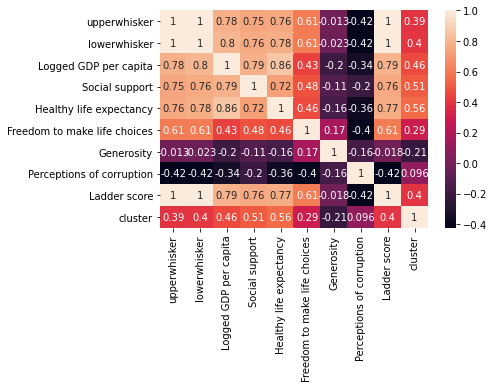

In [26]:
import seaborn as sns

# Quéremos ver las variables que ma´s están correlacionadas unas con otras. 
# Vemos que las dos variables que más correlación tienen con los cluster,
# son la variable Social support y la variable Healthy life expectancy.

sns.heatmap(data_for_clustering.corr(),annot=True)

## Algunos análisis

Text(0.5, 1.0, 'Los 10 países más felices 2021')

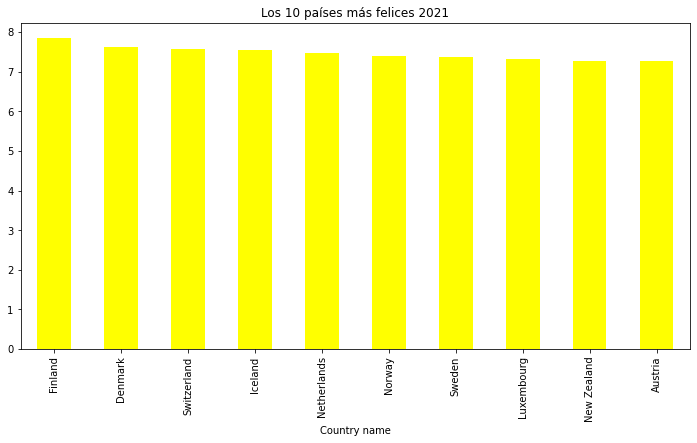

In [27]:
data2021.groupby('Country name')['Ladder score'].max().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6),color='yellow')
plt.title('Los 10 países más felices 2021')

In [28]:
Finland = data2021[data2021['Country name'] == 'Finland']

Text(0.5, 1.0, 'Los 10 países más infelices')

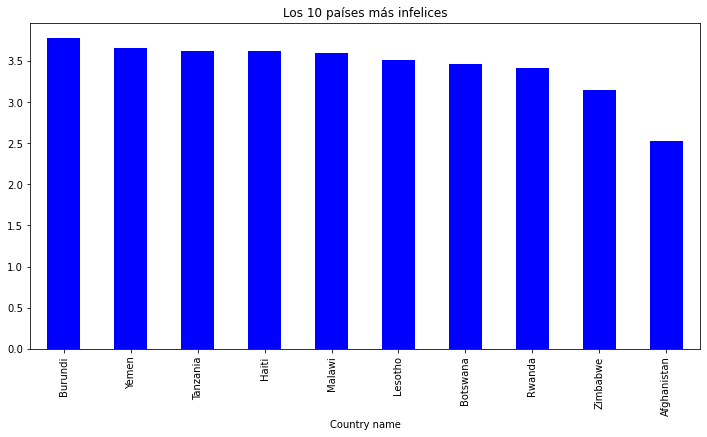

In [29]:
data2021.groupby('Country name')['Ladder score'].max().sort_values(ascending=False).tail(10).plot(kind='bar', figsize=(12,6),color='blue')
plt.title('Los 10 países más infelices')

Text(0.5, 1.0, 'Los 5 regiones más felices 2021')

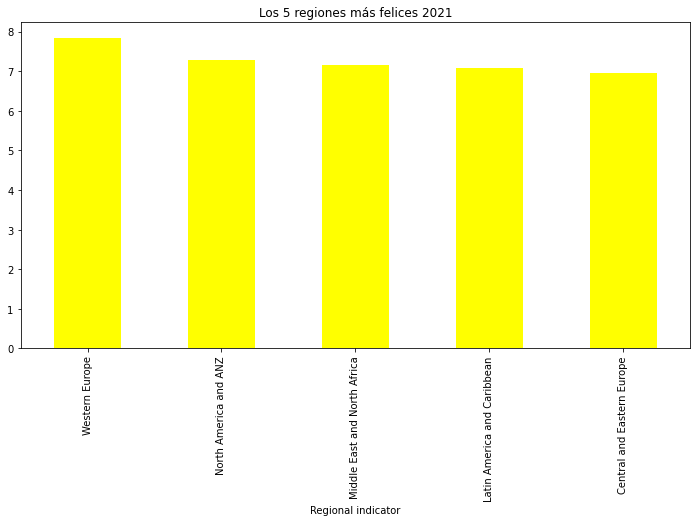

In [30]:
data2021.groupby('Regional indicator')['Ladder score'].max().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(12,6),color='yellow')
plt.title('Los 5 regiones más felices 2021')

Text(0.5, 1.0, 'Las 5 regiones más infelices')

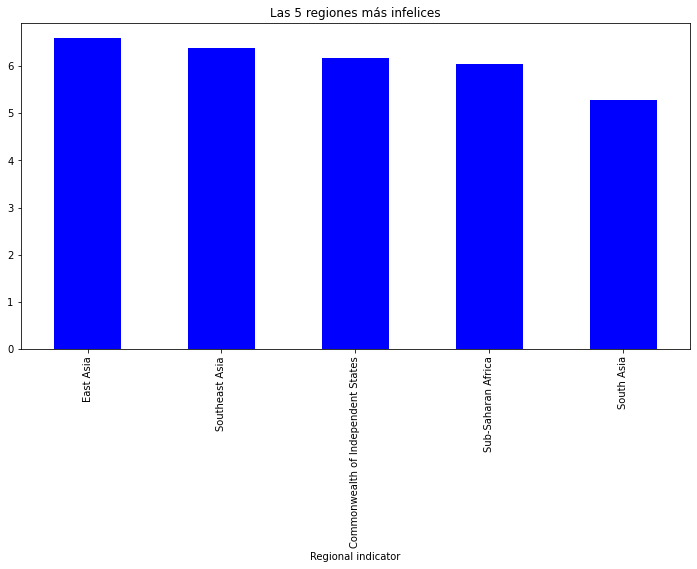

In [31]:
data2021.groupby('Regional indicator')['Ladder score'].max().sort_values(ascending=False).tail(5).plot(kind='bar', figsize=(12,6),color='blue')
plt.title('Las 5 regiones más infelices')

## Colombia desde 2006 hasta 2020

In [32]:
Colombia = pd.read_csv("world-happiness-report.csv")
Colombia =  Colombia[Colombia['Country name'] == 'Colombia']
Colombia

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
357,Colombia,2006,6.025,9.277,0.910,65.22,0.805,-0.015,0.808,0.800,0.326
358,Colombia,2007,6.138,9.330,0.894,65.34,0.786,-0.040,0.860,0.808,0.287
359,Colombia,2008,6.168,9.351,0.880,65.46,0.795,-0.042,0.763,0.803,0.307
360,Colombia,2009,6.272,9.351,0.886,65.58,0.757,-0.055,0.837,0.843,0.273
361,Colombia,2010,6.408,9.384,0.893,65.70,0.816,-0.050,0.815,0.831,0.265
362,Colombia,2011,6.464,9.442,0.904,65.92,0.811,-0.073,0.847,0.832,0.286
363,Colombia,2012,6.375,9.471,0.914,66.14,0.828,-0.009,0.868,0.846,0.294
364,Colombia,2013,6.607,9.512,0.901,66.36,0.841,-0.071,0.898,0.851,0.278
365,Colombia,2014,6.449,9.546,0.907,66.58,0.801,-0.090,0.887,0.847,0.278
366,Colombia,2015,6.388,9.564,0.890,66.80,0.791,-0.100,0.843,0.839,0.292


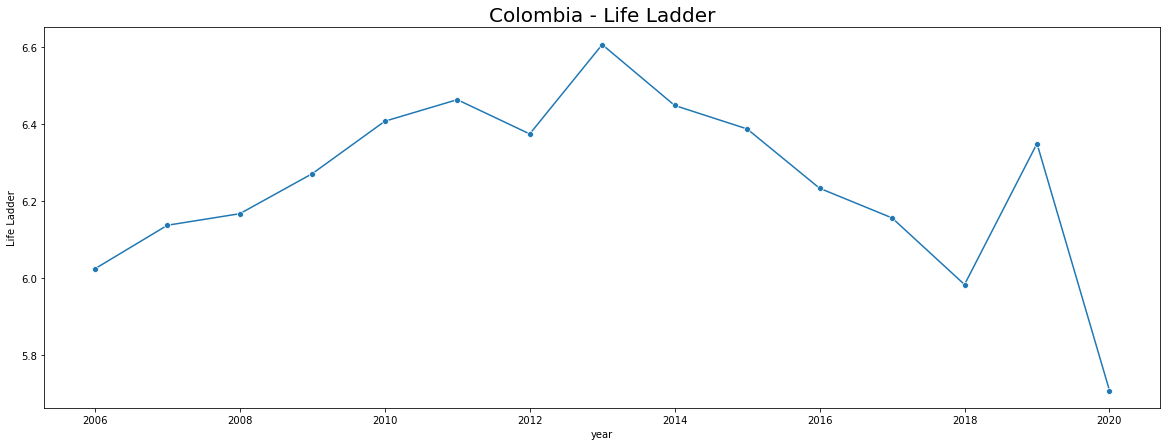

In [33]:
plt.figure(figsize=(20,7))
sns.lineplot(data=Colombia, x="year",y="Life Ladder",marker='o')
plt.title("Colombia - Life Ladder", fontsize = 20)
plt.show()

In [34]:
Colombia2021 = data2021[data2021['Country name'] == 'Colombia']

In [35]:
# Datos de Colombia en 2021
Colombia2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
51,Colombia,Latin America and Caribbean,6.012,0.061,6.132,5.892,9.557,0.847,68.001,0.837,-0.135,0.841,2.43,1.021,0.866,0.615,0.554,0.1,0.063,2.794
